### *Esto es el mi primer mapa + q intenté plotear los nbi por radios y malio sal*

In [1]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

In [2]:
caba = gpd.read_file(
    r"C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\geo\CABA.shp")

In [3]:
caba.head()


distrito                        provincia departamen   cabecera circuito  \
0       01  Ciudad Autónoma de Buenos Aires   Comuna 1   Comuna 1     0003   
1       01  Ciudad Autónoma de Buenos Aires   Comuna 4   Comuna 4     0045   
2       01  Ciudad Autónoma de Buenos Aires   Comuna 3   Comuna 3     0037   
3       01  Ciudad Autónoma de Buenos Aires   Comuna 1   Comuna 1     0018   
4       01  Ciudad Autónoma de Buenos Aires  Comuna 13  Comuna 13     0141   

  indec_p indec_d                                           geometry  
0      02     001  POLYGON Z ((-6496304.252 -4084732.697 0.000, -...  
1      02     004  POLYGON Z ((-6501230.474 -4091702.182 0.000, -...  
2      02     003  POLYGON Z ((-6501166.688 -4087904.826 0.000, -...  
3      02     001  POLYGON Z ((-6498832.986 -4088373.028 0.000, -...  
4      02     013  POLYGON Z ((-6503862.400 -4078547.361 0.000, -...

In [4]:
pp2 = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\elecciones\pp2.csv',  # file path
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
pp2

pp2
NaN        sum
circuito   NaN
1         2113
2         2122
3          812
...        ...
163       2276
164       1900
165       3588
166       2569
167       2033

[169 rows x 1 columns]

ACOMODAMOS LOS FRAMES 

In [5]:
pp2 = pp2.reset_index()

In [6]:
pp2

index   pp2
0         NaN   sum
1    circuito   NaN
2           1  2113
3           2  2122
4           3   812
..        ...   ...
164       163  2276
165       164  1900
166       165  3588
167       166  2569
168       167  2033

[169 rows x 2 columns]

In [7]:
pp2 = pp2.rename(columns={'index':'circuito'})

In [8]:
pp2

circuito   pp2
0         NaN   sum
1    circuito   NaN
2           1  2113
3           2  2122
4           3   812
..        ...   ...
164       163  2276
165       164  1900
166       165  3588
167       166  2569
168       167  2033

[169 rows x 2 columns]

In [9]:
pp2 = pp2.drop([0, 1],axis=0)

In [10]:
pp2 = pp2.astype({"circuito":int})
pp2.dtypes

circuito     int32
pp2         object
dtype: object

In [11]:
caba = caba.astype({"circuito":int})
caba.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
dtype: object

### MERGE CANDIDATO CON EL ESPACIO

In [12]:
mapa_left = pd.merge(caba, pp2, on="circuito", how="inner")
mapa_left

distrito                        provincia departamen   cabecera  circuito  \
0         01  Ciudad Autónoma de Buenos Aires   Comuna 1   Comuna 1         3   
1         01  Ciudad Autónoma de Buenos Aires   Comuna 4   Comuna 4        45   
2         01  Ciudad Autónoma de Buenos Aires   Comuna 3   Comuna 3        37   
3         01  Ciudad Autónoma de Buenos Aires   Comuna 1   Comuna 1        18   
4         01  Ciudad Autónoma de Buenos Aires  Comuna 13  Comuna 13       141   
..       ...                              ...        ...        ...       ...   
162       01  Ciudad Autónoma de Buenos Aires  Comuna 13  Comuna 13       135   
163       01  Ciudad Autónoma de Buenos Aires  Comuna 14  Comuna 14       149   
164       01  Ciudad Autónoma de Buenos Aires   Comuna 9   Comuna 9       101   
165       01  Ciudad Autónoma de Buenos Aires  Comuna 10  Comuna 10       102   
166       01  Ciudad Autónoma de Buenos Aires   Comuna 8   Comuna 8        88   

    indec_p indec_d                                           geometry   pp2  
0        02     001  POLYGON Z ((-6496304.252 -4084732.697 0.000, -...   812  
1        02     004  POLYGON Z ((-6501230.474 -4091702.182 0.000, -...  3134  
2        02     003  POLYGON Z ((-6501166.688 -4087904.826 0.000, -...  2572  
3        02     001  POLYGON Z ((-6498832.986 -4088373.028 0.000, -...  2084  
4        02     013  POLYGON Z ((-6503862.400 -4078547.361 0.000, -...  1725  
..      ...     ...                                                ...   ...  
162      02     013  POLYGON Z ((-6507834.614 -4077215.626 0.000, -...  1460  
163      02     014  POLYGON Z ((-6503253.371 -4080723.227 0.000, -...  3007  
164      02     009  POLYGON Z ((-6515182.479 -4090061.116 0.000, -...  3835  
165      02     010  POLYGON Z ((-6514598.831 -4088679.114 0.000, -...  1536  
166      02     008  POLYGON Z ((-6509495.834 -4096454.887 0.000, -...  3594  

[167 rows x 9 columns]

In [13]:
mapa_left = mapa_left.astype({"pp2":int})
mapa_left.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
pp2              int32
dtype: object

### MAPEO

<AxesSubplot:>

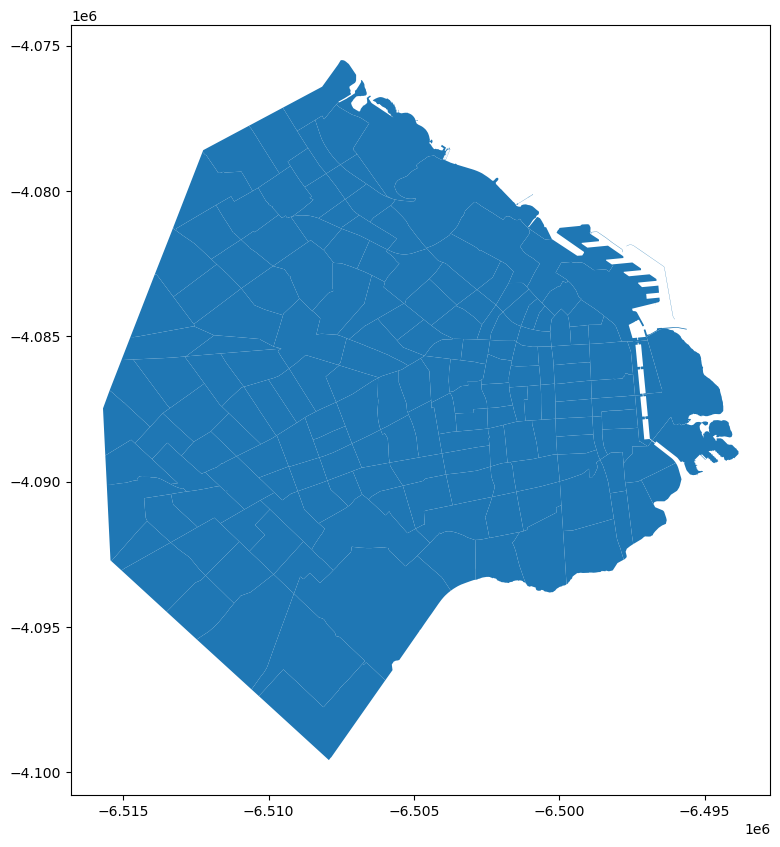

In [14]:
mapa_left.plot(figsize=(20, 10))

<AxesSubplot:>

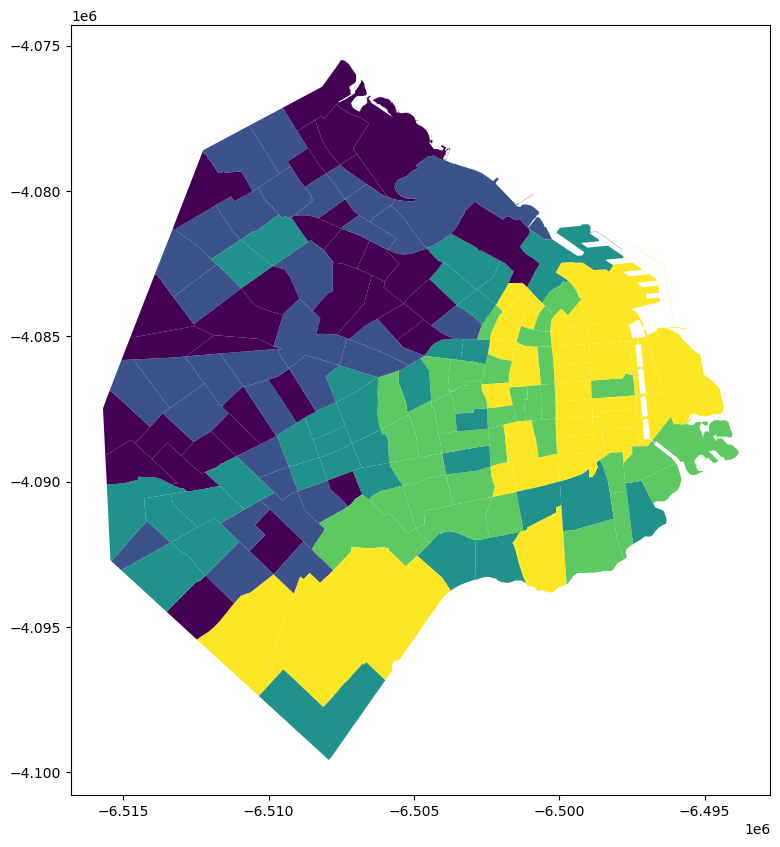

In [15]:

mapa_left['logRatio'] = (mapa_left.pp2/ mapa_left.circuito)
mapa_left.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))


### LIMPIEZA DE GEODF DE RADIOS

In [16]:
radios = gpd.read_file(
    r"C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\censo\radios censales\CABA_radios.shp")
radios.columns

Index(['RADIO', 'VULNERABIL', 'NSE', 'CENTRO_DE_', 'HOSPITAL', 'POSTA_SANI',
       'IDPROV', 'PROV', 'IDDPTO', 'DPTO', 'REDCODE', 'RADIOS_POB',
       'RADIOS_HOG', 'RADIOS_LAT', 'RADIOS_LON', 'RADIOS_SUP', 'geometry'],
      dtype='object')

In [17]:
radios.head()

RADIO  VULNERABIL       NSE CENTRO_DE_            HOSPITAL POSTA_SANI  \
0  020010101    0.802284 -0.456724     16.348              38.006     105.48   
1  020010201    0.817588 -0.456724     16.976               46.61    133.978   
2  020010202    0.820031 -0.456724     18.384              48.838    135.066   
3  020010203    0.818413 -0.456724     14.448              48.746    131.126   
4  020010204    0.825755 -0.456724     11.074  50.410000000000004    121.272   

  IDPROV                              PROV IDDPTO      DPTO    REDCODE  \
0     02  Ciudad AutÃ³noma de Buenos Aires  02001  Comuna 1  020010101   
1     02  Ciudad AutÃ³noma de Buenos Aires  02001  Comuna 1  020010201   
2     02  Ciudad AutÃ³noma de Buenos Aires  02001  Comuna 1  020010202   
3     02  Ciudad AutÃ³noma de Buenos Aires  02001  Comuna 1  020010203   
4     02  Ciudad AutÃ³noma de Buenos Aires  02001  Comuna 1  020010204   

   RADIOS_POB  RADIOS_HOG  RADIOS_LAT  RADIOS_LON  RADIOS_SUP  \
0         336          65  -34.586689  -58.368836       1.794   
1         478         161  -34.578623  -58.386987       0.027   
2         401         128  -34.579194  -58.387533       0.018   
3         337         104  -34.580158  -58.385503       0.011   
4         602         163  -34.580006  -58.382654       0.136   

                                            geometry  
0  POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...  
1  POLYGON ((-58.38920 -34.57818, -58.38893 -34.5...  
2  POLYGON ((-58.38909 -34.57855, -58.38890 -34.5...  
3  POLYGON ((-58.38603 -34.57947, -58.38508 -34.5...  
4  POLYGON ((-58.38562 -34.57822, -58.38551 -34.5...

In [18]:
radios = radios[['RADIO', 'IDDPTO', 'DPTO', 'RADIOS_POB', 'RADIOS_HOG', 'geometry']]
radios


RADIO IDDPTO       DPTO  RADIOS_POB  RADIOS_HOG  \
0     020010101  02001   Comuna 1         336          65   
1     020010201  02001   Comuna 1         478         161   
2     020010202  02001   Comuna 1         401         128   
3     020010203  02001   Comuna 1         337         104   
4     020010204  02001   Comuna 1         602         163   
...         ...    ...        ...         ...         ...   
3548  020152109  02015  Comuna 15         863         392   
3549  020152110  02015  Comuna 15         613         278   
3550  020152111  02015  Comuna 15         697         335   
3551  020152112  02015  Comuna 15         510         217   
3552  020152113  02015  Comuna 15         895         389   

                                               geometry  
0     POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...  
1     POLYGON ((-58.38920 -34.57818, -58.38893 -34.5...  
2     POLYGON ((-58.38909 -34.57855, -58.38890 -34.5...  
3     POLYGON ((-58.38603 -34.57947, -58.38508 -34.5...  
4     POLYGON ((-58.38562 -34.57822, -58.38551 -34.5...  
...                                                 ...  
3548  POLYGON ((-58.43221 -34.59950, -58.43113 -34.5...  
3549  POLYGON ((-58.43113 -34.59880, -58.43006 -34.5...  
3550  POLYGON ((-58.43006 -34.59811, -58.42899 -34.5...  
3551  POLYGON ((-58.42899 -34.59743, -58.42784 -34.5...  
3552  POLYGON ((-58.42784 -34.59670, -58.42702 -34.5...  

[3553 rows x 6 columns]

In [19]:
radios.reset_index(inplace=True)


In [20]:
radios["RADIO_REF_ID"] = radios["index"] + 1
radios.head()

index      RADIO IDDPTO      DPTO  RADIOS_POB  RADIOS_HOG  \
0      0  020010101  02001  Comuna 1         336          65   
1      1  020010201  02001  Comuna 1         478         161   
2      2  020010202  02001  Comuna 1         401         128   
3      3  020010203  02001  Comuna 1         337         104   
4      4  020010204  02001  Comuna 1         602         163   

                                            geometry  RADIO_REF_ID  
0  POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...             1  
1  POLYGON ((-58.38920 -34.57818, -58.38893 -34.5...             2  
2  POLYGON ((-58.38909 -34.57855, -58.38890 -34.5...             3  
3  POLYGON ((-58.38603 -34.57947, -58.38508 -34.5...             4  
4  POLYGON ((-58.38562 -34.57822, -58.38551 -34.5...             5

In [21]:
radios.drop('index', axis=1, inplace=True)

In [22]:
radios.dtypes

RADIO             object
IDDPTO            object
DPTO              object
RADIOS_POB         int64
RADIOS_HOG         int64
geometry        geometry
RADIO_REF_ID       int64
dtype: object

In [23]:
radios = radios.astype({"RADIO":int, "IDDPTO":int,})
radios.dtypes

RADIO              int32
IDDPTO             int32
DPTO              object
RADIOS_POB         int64
RADIOS_HOG         int64
geometry        geometry
RADIO_REF_ID       int64
dtype: object

### MAPA CENSO

In [24]:
censo = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\censo\censo_conhogar.csv',
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
censo.head()

VIVIENDA_REF_ID  RADIO_REF_ID      MUNI  HOGAR_REF_ID  H19D  INDHAC  \
0                1             1  20010001             1     2       1   
1                1             1  20010001             2     1       1   
2                1             1  20010001             3     1       1   
3                1             1  20010001             3     1       1   
4                1             1  20010001             4     1       6   

   ALGUNBI  PROP  PERSONA_REF_ID  P02  P03  EDADQUI  P09  CONDACT  
0        0     5               1    2   61       13    4        1  
1        0     1               2    1   48       10    4        1  
2        0     1               3    1   65       14    7        1  
3        0     1               4    2   62       13    6        3  
4        1     5               5    1   20        5    4        1

In [25]:
nbi_censo = censo[["HOGAR_REF_ID", "RADIO_REF_ID", "MUNI", "ALGUNBI"]]

In [26]:
mapa_nbi = pd.merge(nbi_censo, radios, on="RADIO_REF_ID", how="left")
mapa_nbi

HOGAR_REF_ID  RADIO_REF_ID      MUNI  ALGUNBI     RADIO  IDDPTO  \
0                   1             1  20010001        0  20010101    2001   
1                   2             1  20010001        0  20010101    2001   
2                   3             1  20010001        0  20010101    2001   
3                   3             1  20010001        0  20010101    2001   
4                   4             1  20010001        1  20010101    2001   
...               ...           ...       ...      ...       ...     ...   
2890146       1152599          3553  20150001        2  20152113    2015   
2890147       1152599          3553  20150001        2  20152113    2015   
2890148       1152599          3553  20150001        2  20152113    2015   
2890149       1152599          3553  20150001        2  20152113    2015   
2890150       1152599          3553  20150001        2  20152113    2015   

              DPTO  RADIOS_POB  RADIOS_HOG  \
0         Comuna 1         336          65   
1         Comuna 1         336          65   
2         Comuna 1         336          65   
3         Comuna 1         336          65   
4         Comuna 1         336          65   
...            ...         ...         ...   
2890146  Comuna 15         895         389   
2890147  Comuna 15         895         389   
2890148  Comuna 15         895         389   
2890149  Comuna 15         895         389   
2890150  Comuna 15         895         389   

                                                  geometry  
0        POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...  
1        POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...  
2        POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...  
3        POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...  
4        POLYGON ((-58.37430 -34.57870, -58.36801 -34.5...  
...                                                    ...  
2890146  POLYGON ((-58.42784 -34.59670, -58.42702 -34.5...  
2890147  POLYGON ((-58.42784 -34.59670, -58.42702 -34.5...  
2890148  POLYGON ((-58.42784 -34.59670, -58.42702 -34.5...  
2890149  POLYGON ((-58.42784 -34.59670, -58.42702 -34.5...  
2890150  POLYGON ((-58.42784 -34.59670, -58.42702 -34.5...  

[2890151 rows x 10 columns]

AttributeError: 'Line2D' object has no property 'scheme'

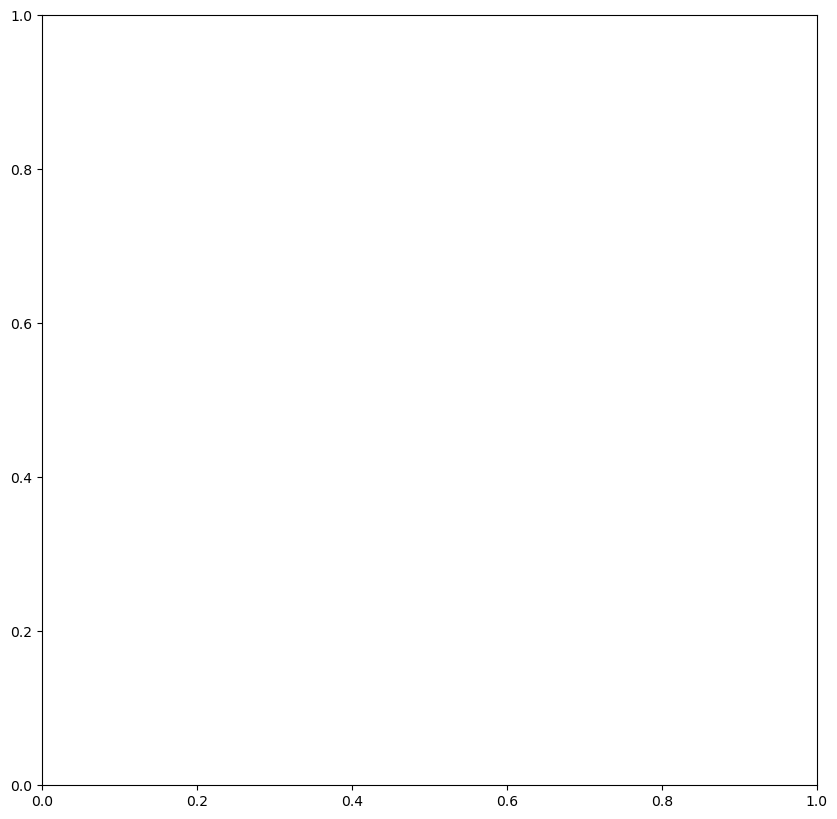

In [27]:
mapa_nbi['logRatio'] = (mapa_nbi.ALGUNBI/ mapa_nbi.RADIO_REF_ID)
mapa_nbi.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))